# 根据all_tweets产生的数据结果进行分析

In [116]:
from my_weapon import *
from collections import defaultdict, Counter
from IPython.display import display
from tqdm import tqdm_notebook as tqdm
import matplotlib
from datetime import datetime

sns.set(style="darkgrid", font_scale=1.5)
sns.set_palette("coolwarm", 8)
ira_c = sns.color_palette("coolwarm", 10)[9]
all_c = sns.color_palette("coolwarm", 10)[0]

TOP hostnames

In [18]:
ht_count = Counter()

for line in tqdm(open("disk/all_tweets_withURL.json")):
    ht_count[json.loads(line)["final_hostname"]] += 1
    break

In [19]:
for ht, c in ht_count.most_common():
    if c > 100:
        print(ht, c, sep=",", file=open("hostname_cnt.csv", "a"))

# Load all tweets

In [77]:
print("loading all tweets_csv ...")
%time all_tweets = pd.read_csv("disk/all-tweets.csv", dtype=str)
# all_tweets = all_tweets.astype(
#     {"is_IRA": int, "is_source": int, "dt": datetime})
all_tweets = all_tweets.astype({"is_IRA": int, "is_source": int})
print("finished!")

loading all tweets_csv ...
CPU times: user 52.6 s, sys: 3.3 s, total: 55.9 s
Wall time: 1min
finished!


In [78]:
len(all_tweets)

36232050

In [79]:
len(all_tweets[all_tweets.is_source==1])

11059347

In [80]:
non_tweets = all_tweets[all_tweets.is_IRA==0]
len(non_tweets)

36170276

In [81]:
ira_tweets = all_tweets[all_tweets.is_IRA==1]
len(ira_tweets)

61774

In [82]:
fake_tweets = all_tweets[all_tweets.c_alex=="fake"]

In [83]:
print(len(fake_tweets[(fake_tweets.is_IRA==1) & (fake_tweets.is_source==1)]), \
len(fake_tweets[(fake_tweets.is_IRA==1) & (fake_tweets.is_source==0)]))

print(len(fake_tweets[(fake_tweets.is_IRA==0) & (fake_tweets.is_source==1)]), \
len(fake_tweets[(fake_tweets.is_IRA==0) & (fake_tweets.is_source==0)]))

908 1987
1419955 2521951


In [84]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)",
#     "local"
]

In [85]:
sns.set_style("darkgrid")
sns.set_palette("coolwarm_r", n_colors=8)

# media_type_counts = tweets["c_alex"].value_counts(normalize=True)
media_type_counts = non_tweets["c_alex"].value_counts()
display(media_type_counts)

left leaning            8627664
center                  6946011
left                    4737216
right                   4549287
extreme bias (right)    4457023
fake                    3941906
right leaning           1167901
wiki                     691264
extreme bias (left)      644571
local                    243594
radio                     96714
auto                      47260
black                     13243
military                   6193
Arabic                      391
Syria                        38
Name: c_alex, dtype: int64

In [86]:
non_tweets["c_alex"].value_counts(normalize=True)

left leaning            0.238529
center                  0.192036
left                    0.130970
right                   0.125774
extreme bias (right)    0.123223
fake                    0.108982
right leaning           0.032289
wiki                    0.019111
extreme bias (left)     0.017820
local                   0.006735
radio                   0.002674
auto                    0.001307
black                   0.000366
military                0.000171
Arabic                  0.000011
Syria                   0.000001
Name: c_alex, dtype: float64

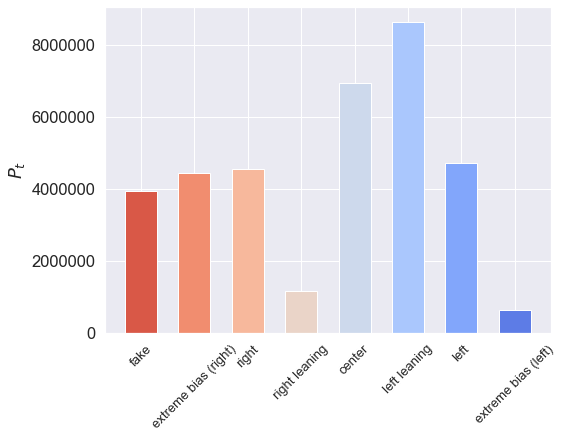

In [87]:
plt.figure(figsize=(8, 6))
# x = range(len(media_type_counts))
x = range(8)

for i in x:
    plt.bar(i, media_type_counts[labels[i]], width=0.6)
    
plt.xticks(x, [labels[i] for i in x])
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel("$P_t$")
plt.xticks(rotation=45, fontsize=13)
# plt.yticks(fontsize=14)

plt.savefig("fig/Pt-all.pdf", dpi=300, bbox_inches='tight')

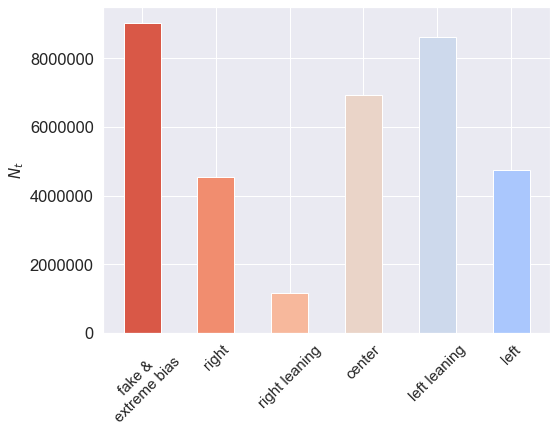

In [88]:
plt.figure(figsize=(8, 6))
x = range(6)

for i in x:
    if i == 0:
        plt.bar(i, media_type_counts[labels[0]] + media_type_counts[labels[1]]
                    + media_type_counts[labels[7]], width=0.5)
    else:
        plt.bar(i, media_type_counts[labels[i + 1]], width=0.5)

new_labels = ["fake &\nextreme bias", "right", "right leaning", "center", "left leaning", "left"]
plt.xticks(x, new_labels)
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel('$N_{t}$', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
# plt.yticks(fontsize=14)

plt.savefig("fig/Nt-all.pdf", dpi=300, bbox_inches='tight')

In [89]:
# tweets = ira_tweets[ira_tweets.c_alex!="-1"]
# media_type_counts = tweets["c_alex"].value_counts(normalize=True)
media_type_counts = ira_tweets["c_alex"].value_counts()
display(media_type_counts)

local                   26689
left leaning             6293
right                    5423
center                   4989
radio                    3686
fake                     2895
extreme bias (right)     2883
left                     2671
right leaning            2164
black                    1602
auto                      963
Syria                     731
military                  287
wiki                      221
Arabic                    167
extreme bias (left)       110
Name: c_alex, dtype: int64

In [90]:
media_type_counts = ira_tweets["c_alex"].value_counts(normalize=True)
media_type_counts

local                   0.432043
left leaning            0.101871
right                   0.087788
center                  0.080762
radio                   0.059669
fake                    0.046864
extreme bias (right)    0.046670
left                    0.043238
right leaning           0.035031
black                   0.025933
auto                    0.015589
Syria                   0.011833
military                0.004646
wiki                    0.003578
Arabic                  0.002703
extreme bias (left)     0.001781
Name: c_alex, dtype: float64

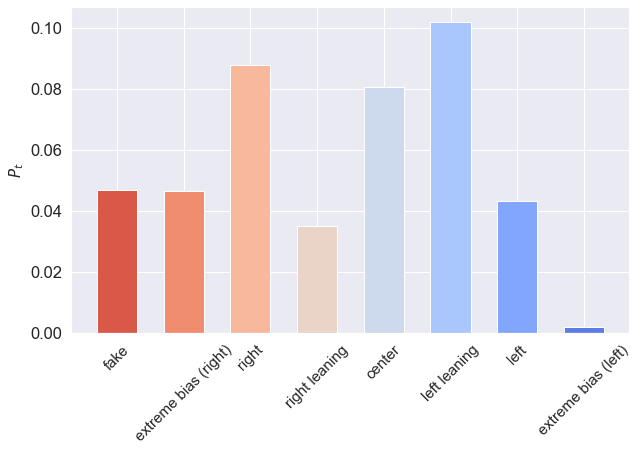

In [91]:
plt.figure(figsize=(10, 6))
x = range(8)

for i in x:
    plt.bar(i, media_type_counts[labels[i]], width=0.6)
    
plt.xticks(x, [labels[i] for i in x])
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel('$P_{t}$', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
# plt.yticks(fontsize=14)

plt.savefig("fig/Pt-ira.pdf", dpi=300, bbox_inches='tight')

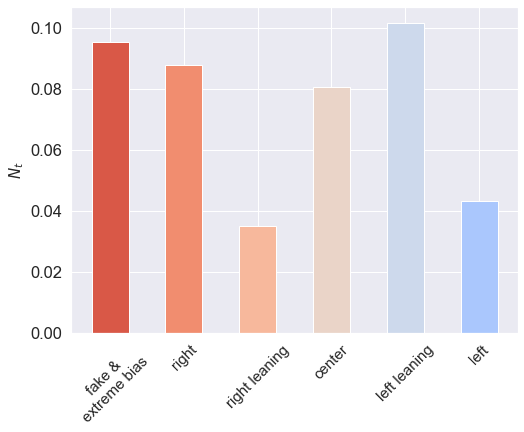

In [92]:
plt.figure(figsize=(8, 6))
x = range(6)

for i in x:
    if i == 0:
        plt.bar(i, media_type_counts[labels[0]] + media_type_counts[labels[1]]
                    + media_type_counts[labels[7]], width=0.5)
    else:
        plt.bar(i, media_type_counts[labels[i + 1]], width=0.5)

new_labels = ["fake &\nextreme bias", "right", "right leaning", "center", "left leaning", "left"]
plt.xticks(x, new_labels)
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel('$N_{t}$', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
# plt.yticks(fontsize=14)

plt.savefig("fig/NT-ira.pdf", dpi=300, bbox_inches='tight')

## IRA作为源，或者参与到其中的消息是否更加爆炸？

In [20]:
ira_as_source = ira_tweets[ira_tweets.is_source == 1]

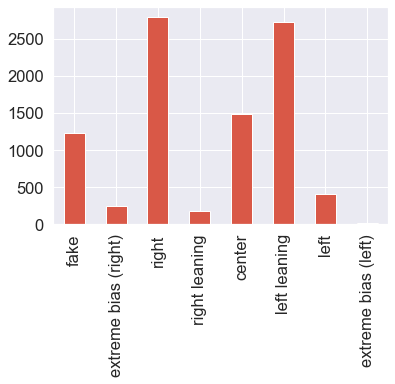

In [78]:
pd.Series(ira_as_source.c_alex.value_counts(), index=[labels[i] for i in range(len(labels))]).plot("bar")

IRA作为源的新闻，被转发多少次

In [44]:
tweets_count = all_tweets.groupby("retweeted_id").count().tweet_id

In [17]:
len(ira_as_source)

7544

In [ ]:
import sys, traceback

media_len_ret = Counter()

for _, row in tqdm(ira_as_source.iterrows()):
    try:
        tweet_id = row["tweet_id"]
        c = int(tweets_count[tweets_count.index==tweet_id].values)
    except:
        c = 0
        # traceback.print_exc()
        
    media_len_ret[row.c_alex] += c

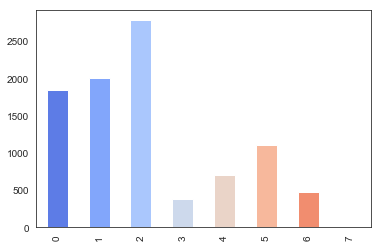

In [17]:
pd.Series(dict_media_len_ret, index=[str(i) for i in range(8)]).plot("bar")

In [18]:
URL_count = all_tweets.URL.value_counts()

7345it [00:01, 7173.16it/s]


0    351.173469
1    944.808525
2    588.846596
3    572.043689
4    237.193947
5    544.730479
6    235.702247
7    107.436170
dtype: float64

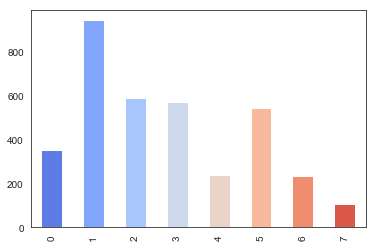

0     412980
1    1440833
2     717804
3     117841
4     384017
5     432516
6     167820
7      10099
dtype: int64

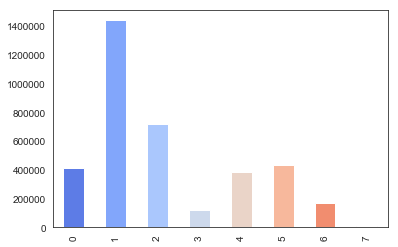

In [19]:
dict_media_len_ret = defaultdict(list)

for _, row in tqdm(IRA_tweets.iterrows()):
    c = int(URL_count[row.URL])
    dict_media_len_ret[row.media_type].append(c)

_ave = {k: sum(v) / len(v) for k, v in dict_media_len_ret.items()}
_sum = {k: sum(v) for k, v in dict_media_len_ret.items()}

d = pd.Series(_ave, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

d = pd.Series(_sum, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

7345it [00:00, 13289.07it/s]


0    216.328990
1    924.779412
2    374.208145
3    250.130435
4    483.034188
5     97.679104
6    253.585366
7    109.384615
dtype: float64

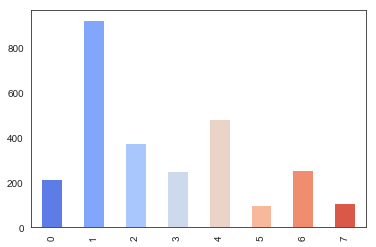

0     66413
1    125770
2     82700
3      5753
4     56515
5     26178
6     20794
7      1422
dtype: int64

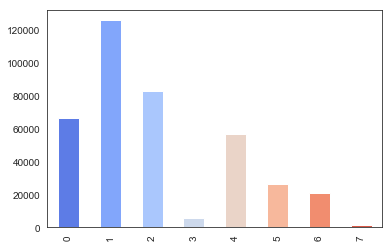

In [20]:
dict_media_len_ret = defaultdict(list)

for _, row in tqdm(IRA_tweets.iterrows()):
    if row.is_source == 1:
        c = int(URL_count[row.URL])
        dict_media_len_ret[row.media_type].append(c)

_ave = {k: sum(v) / len(v) for k, v in dict_media_len_ret.items()}
_sum = {k: sum(v) for k, v in dict_media_len_ret.items()}

d = pd.Series(_ave, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

d = pd.Series(_sum, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

为了作为对比，所有的URL又是什么情况呢？

 # Loading all-users.csv ... ... !!!

!! Already coded in the all_tweets.py for making all-users.csv

In [97]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)",
    "local",
]

# labels = [str(i) for i in range(9)]

In [98]:
# all_users = pd.read_csv("data/all-users-mbfc.csv", index_col="user_id", dtype={"user_id": str})
all_users = pd.read_csv("data/all-users.csv", index_col="user_id", dtype={"user_id": str})
print(len(all_users))
# change the type
# f_labels = [map_labels[k] for k in map_labels]
all_users = all_users.astype({"is_IRA": int})

for label in labels:
    # print(label)
    all_users = all_users.astype({label: int,
                                  label + "_source": int})
#                                   label + "_source_rate": float})

2516728


## Are IRAs the sources of fake news or influencers? 

分析IRA到底在选举期间的作用

In [42]:
IRA_users = all_users[all_users.is_IRA > 0]
len(IRA_users)

360

In [43]:
non_users = all_users[all_users.is_IRA == 0]
len(non_users)

2516368

In [97]:
IRA_users.to_csv("data/IRA-users-20190619.csv")

In [98]:
IRA_users.fake.describe()

count    360.000000
mean       8.041667
std       36.799857
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      409.000000
Name: fake, dtype: float64

In [99]:
IRA_u = IRA_users[labels]

In [100]:
len(IRA_u)

360

In [61]:
IRA_u.loc[:, "fake+right"] = IRA_u["fake"] + IRA_u["extreme bias (right)"] + IRA_u["right"] + \
    IRA_u["right leaning"] + IRA_u["extreme bias (left)"]

/home/alex/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/alex/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [62]:
IRA_u.loc[:, "center+left"] = IRA_u["center"] + IRA_u["left leaning"]

In [63]:
IRA_u.loc[:, "fake+extreme"] = IRA_u["fake"] + IRA_u["extreme bias (right)"]

In [64]:
IRA_u.loc[:, "fake/left"] = np.log((IRA_u["center+left"] + 1)) - np.log((IRA_u["fake+extreme"] + 1))

In [66]:
IRA_u.sort_values("fake+extreme", ascending=False)[:25]

,fake,extreme bias (right),right,right leaning,center,left leaning,left,extreme bias (left),local,fake+right,center+left,fake+extreme,fake/left
user_id,,,,,,,,,,,,,
1679279490,245,454,379,87,180,184,67,8,13,1173,364,699,-0.651183
3978316814,670,0,1,0,3,10,4,1,0,672,13,670,-3.869712
1671234620,184,362,242,42,103,76,16,2,10,832,179,546,-1.111492
789266125485998080,409,0,0,0,178,0,0,0,0,409,178,409,-0.828771
1662779209,84,263,232,37,41,37,5,0,5,616,78,347,-1.482755
2606301939,65,219,163,22,35,34,4,1,7,470,69,284,-1.403994
1661246144,61,188,197,32,44,33,5,1,6,479,77,249,-1.164752
1629828379,45,120,96,18,27,28,3,0,3,279,55,165,-1.086636
2671070290,52,70,49,8,23,23,13,0,1,179,46,122,-0.962037


In [67]:
IRA_u.sort_values("center+left", ascending=False)[:25]

,fake,extreme bias (right),right,right leaning,center,left leaning,left,extreme bias (left),local,fake+right,center+left,fake+extreme,fake/left
user_id,,,,,,,,,,,,,
2752677905,0,0,0,0,0,680,0,0,0,0,680,0,6.523562
2624554209,0,0,0,0,0,670,0,0,0,0,670,0,6.508769
2743327187,0,0,0,98,0,386,1,0,0,98,386,0,5.958425
1679279490,245,454,379,87,180,184,67,8,13,1173,364,699,-0.651183
1671234620,184,362,242,42,103,76,16,2,10,832,179,546,-1.111492
789266125485998080,409,0,0,0,178,0,0,0,0,409,178,409,-0.828771
3899481526,2,0,118,16,90,67,9,0,0,136,157,2,3.963983
2577082467,0,0,0,0,35,117,0,0,0,0,152,0,5.030438
1652987412,0,5,5,7,72,75,40,9,3,26,147,5,3.205453


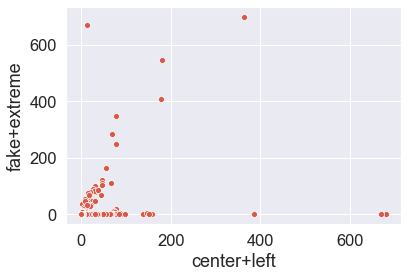

In [68]:
sns.scatterplot(x="center+left", y="fake+extreme", data=IRA_u)
# plt.title("Number of IRA's tweets corresponding to media categories")
# plt.xscale("log")
# plt.yscale("log")

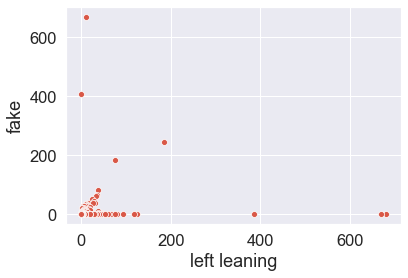

In [69]:
sns.scatterplot(x="left leaning", y="fake", data=IRA_u)
# plt.xscale("log")
# plt.yscale("log")

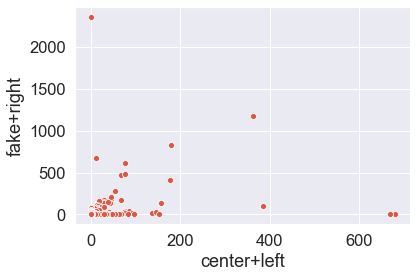

In [70]:
sns.scatterplot(x="center+left", y="fake+right", data=IRA_u)
# plt.xscale("log")
# plt.yscale("log")

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will re

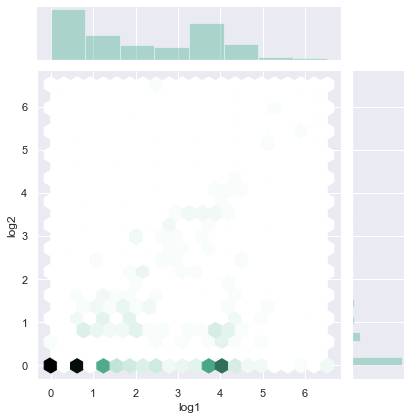

In [71]:
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

IRA_u['log1'] = np.log(IRA_u["center+left"] + 1)
IRA_u['log2'] = np.log(IRA_u["fake"] + 1)
sns.jointplot(x="log1", y="log2", data=IRA_u, kind="hex", color="#4CB391")

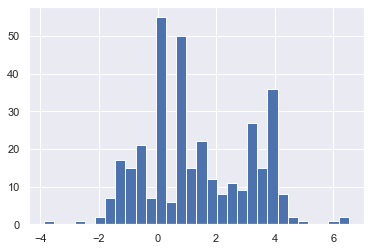

In [72]:
IRA_u["fake/left"].hist(bins=30)

In [104]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)",
#     "local"
]

In [145]:
def get_big_table(_users):
    big_table = []

    for lab in labels:
        volume = int(_users[lab].sum()) # 某种媒体上总和
        source_volume = int(_users[lab + "_source"].sum())
#         first_volume = _users[lab + "_first"].sum()
#         source_rate = _users[_users[lab + "_source_rate"] > 0][lab + "_source_rate"].mean()
#         first_rate = _users[_users[lab + "_first_rate"] > 0][lab + "_first_rate"].mean()
        user_volume = len(_users[_users[lab]>0])
        source_user_volume = len(_users[_users[lab + "_source"]>0])
        
#         d = dict(Nt=volume, Ns=source_volume, Nu=user_volume,
#                  Rs=source_rate, Rf=first_rate, Nsu=source_user_volume, Nf=first_volume)

        d = dict(Nt=volume, Ns=source_volume, Nu=user_volume, Nsu=source_user_volume)
        big_table.append(d)
    
    big_table = pd.DataFrame(big_table, index=labels)
    big_table["Pt"] = big_table["Nt"] / big_table["Nt"].sum()
    big_table["Ps"] = big_table["Ns"] / big_table["Ns"].sum()
    big_table["Ns/Nt"] = big_table["Ns"] / big_table["Nt"]
#     big_table["Nf/Nt"] = big_table["Nf"] / big_table["Nt"]
    big_table["Nt/Nu"] = big_table["Nt"] / big_table["Nu"]
    big_table["Ns/Nsu"] = big_table["Ns"] / big_table["Nsu"]

    big_table = big_table[["Nt", "Pt", "Ns", "Ns/Nt", "Ps", "Nu", "Nt/Nu", "Nsu", "Ns/Nsu"]]
    
    big_table = big_table.round(2)
#     big_table = big_table[["Nt", "Pt", "Ns", "Ns/Nt", "Ps", "Nu", "Nt/Nu", "Nsu", "Ns/Nsu"]]
#     big_table = big_table[["Nt", "Pt", "Ns", "Ps", "Ns/Nt", "Nu", "Rs", "Rf", "Nt/Nu"]]
    return big_table


def plot_compare(col_name):
    ax = plt.figure(figsize=(10, 6))
    plt.ylabel(col_name, fontsize=15)
    print(BT[col_name])
    print(BT2[col_name])
    BT[col_name].plot.bar(width=0.3, position=1, color=ira_c, label="IRA")
    BT2[col_name].plot.bar(width=0.3, position=0, color=all_c, label="non-IRA")
    
    plt.xlim(-1, len(labels))
    
#     if col_name == "Ns/Nt":
#         plt.ylim((0, 0.5))
#     if col_name == "Rs":
#         plt.ylim((0, 0.15))
#     if col_name == "Rf":
#         plt.ylim((0, 0.08))
    
    plt.xticks(fontsize=14, rotation=45)
    plt.legend(fontsize=13)
    if col_name == "Pt":
        plt.ylabel("$P_{t}$")
#         plt.ylim(0, 0.5)
    col_name = col_name.replace("/", "-")
    plt.savefig("fig/{}.pdf".format(col_name), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    
def plot_col(BT, col_name, cNum=-1):
    x = range(6)
    print(labels)
    for i in x:
        if i == 0:
            plt.bar(i, BT[col_name][labels[0]] + BT[col_name][labels[1]] + BT[col_name][labels[7]],
                    width=0.5)
        else:
            plt.bar(i, BT[col_name][labels[i + 1]], width=0.5)
            
    sns.set_palette("coolwarm_r", 6)
    new_labels = ["fake &\nextreme bias", "right", "right leaning", "center", "left leaning", "left"]
    plt.xticks(x, new_labels)
    # plt.xlabel("IRAs", fontsize=18)
    plt.ylabel('$P_{t}$', fontsize=15)
    plt.xticks(rotation=45, fontsize=15)
    # plt.yticks(fontsize=14)

#     plt.ylabel(col_name, fontsize=15)
#     print(BT[col_name])
#     BT[col_name].plot.bar(width=0.3)
#     plt.xlim(-1, len(labels))
    
#     if col_name == "Ns/Nt":
#         plt.ylim((0, 0.5))
#     if col_name == "Rs":
#         plt.ylim((0, 0.15))
#     if col_name == "Rf":
#         plt.ylim((0, 0.08))
    
    if cNum != -1:
        plt.savefig(f"fig/C_{cNum}_{col_name}.pdf", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    

def plot_community(cNum):
    """
    描绘社团的政治光谱
    """
    # get users
    if cNum == -1:
        users_comm = [k for k in comm]
    else:
        users_comm = [k for k in comm if comm[k] == cNum]
        
    all_users_comm = all_users.reindex(users_comm)
    
    non_comm = all_users_comm[all_users_comm.is_IRA == 0]
    _BT = get_big_table(non_comm)
    _BT.to_csv(f"data/non_c{cNum}_BT.csv", float_format="%.2f")
    display(_BT)
    # plot_col(_BT, "Pt")
    
    ira_comm = all_users_comm[all_users_comm.is_IRA > 0]
    print(len(non_comm), len(ira_comm))
    
    _BT2 = get_big_table(ira_comm)
    _BT2.to_csv(f"data/IRA_c{cNum}_BT.csv", float_format="%.2f")
    display(_BT2)
    # plot_col(_BT2, "Pt")
    
    plot_compare_comm(_BT, _BT2, "Pt", cNum)
    plot_col(_BT, "Pt")
    
    
def plot_compare_comm(BT, BT2, col_name, cNum):
    """
    比较一个社团内IRA与non-IRA在col_name上的差异
    """

    ax = plt.figure(figsize=(10, 6))
    plt.ylabel(col_name, fontsize=15)
#     print(BT[col_name])
#     print(BT2[col_name])
    BT[col_name].plot.bar(width=0.3, position=1, color=ira_c, label="IRA")
    BT2[col_name].plot.bar(width=0.3, position=0, color=all_c, label="non-IRA")

    
    plt.xlim(-1, len(labels))
    
#     if col_name == "Ns/Nt":
#         plt.ylim((0, 0.5))
#     if col_name == "Rs":
#         plt.ylim((0, 0.15))
#     if col_name == "Rf":
#         plt.ylim((0, 0.08))
    
    plt.xticks(fontsize=14, rotation=45)
    plt.legend(fontsize=13)
    if col_name == "Pt":
        plt.ylabel("$P_{t}$")
        plt.ylim(0, 0.4) 
    col_name = col_name.replace("/", "-")
    plt.savefig(f"fig/c{cNum}-{col_name}.pdf", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

In [146]:
BT2 = get_big_table(non_users)
BT2.to_csv("data/non_BT.csv")
BT2

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,3941906,0.11,1419955,0.36,0.13,245000,16.09,95188,14.92
extreme bias (right),4457023,0.13,1269989,0.28,0.12,309134,14.42,106328,11.94
right,4549287,0.13,1228255,0.27,0.11,445954,10.20,149339,8.22
right leaning,1167901,0.03,391123,0.33,0.04,303585,3.85,94301,4.15
center,6946011,0.20,2157614,0.31,0.20,1117481,6.22,290562,7.43
left leaning,8627664,0.25,2534512,0.29,0.23,1403216,6.15,437078,5.80
left,4737216,0.14,1638141,0.35,0.15,711730,6.66,244122,6.71
extreme bias (left),644571,0.02,183279,0.28,0.02,103690,6.22,37662,4.87


In [147]:
BT = get_big_table(IRA_users)
BT.to_csv("data/IRA_BT.csv")
BT

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,2895,0.11,908,0.31,0.10,138,20.98,53,17.13
extreme bias (right),2883,0.11,246,0.09,0.03,123,23.44,47,5.23
right,5423,0.20,2794,0.52,0.32,174,31.17,70,39.91
right leaning,2164,0.08,183,0.08,0.02,182,11.89,37,4.95
center,4989,0.18,1490,0.30,0.17,255,19.56,92,16.20
left leaning,6293,0.23,2735,0.43,0.31,253,24.87,94,29.10
left,2671,0.10,404,0.15,0.05,206,12.97,64,6.31
extreme bias (left),110,0.00,14,0.13,0.00,44,2.50,11,1.27


fake                    0.11
extreme bias (right)    0.11
right                   0.20
right leaning           0.08
center                  0.18
left leaning            0.23
left                    0.10
extreme bias (left)     0.00
Name: Pt, dtype: float64
fake                    0.11
extreme bias (right)    0.13
right                   0.13
right leaning           0.03
center                  0.20
left leaning            0.25
left                    0.14
extreme bias (left)     0.02
Name: Pt, dtype: float64


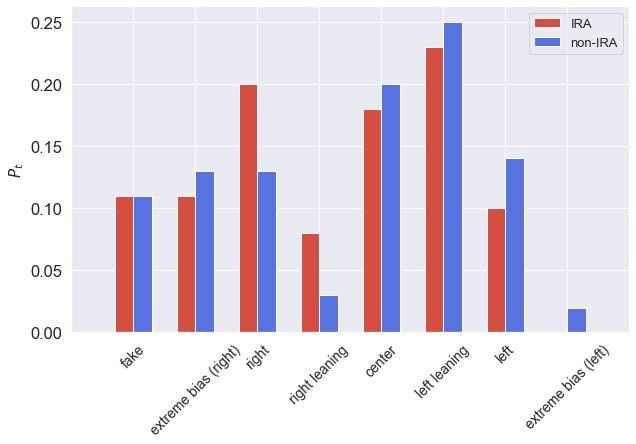

fake                    0.10
extreme bias (right)    0.03
right                   0.32
right leaning           0.02
center                  0.17
left leaning            0.31
left                    0.05
extreme bias (left)     0.00
Name: Ps, dtype: float64
fake                    0.13
extreme bias (right)    0.12
right                   0.11
right leaning           0.04
center                  0.20
left leaning            0.23
left                    0.15
extreme bias (left)     0.02
Name: Ps, dtype: float64


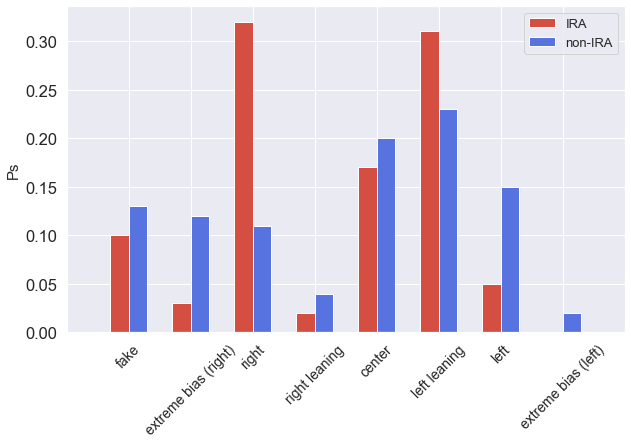

fake                    0.31
extreme bias (right)    0.09
right                   0.52
right leaning           0.08
center                  0.30
left leaning            0.43
left                    0.15
extreme bias (left)     0.13
Name: Ns/Nt, dtype: float64
fake                    0.36
extreme bias (right)    0.28
right                   0.27
right leaning           0.33
center                  0.31
left leaning            0.29
left                    0.35
extreme bias (left)     0.28
Name: Ns/Nt, dtype: float64


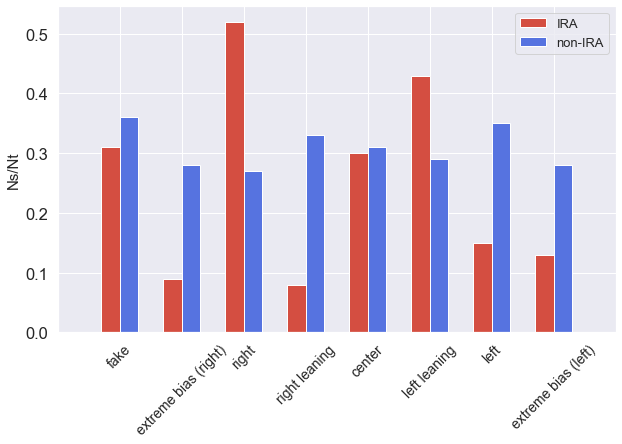

fake                    20.98
extreme bias (right)    23.44
right                   31.17
right leaning           11.89
center                  19.56
left leaning            24.87
left                    12.97
extreme bias (left)      2.50
Name: Nt/Nu, dtype: float64
fake                    16.09
extreme bias (right)    14.42
right                   10.20
right leaning            3.85
center                   6.22
left leaning             6.15
left                     6.66
extreme bias (left)      6.22
Name: Nt/Nu, dtype: float64


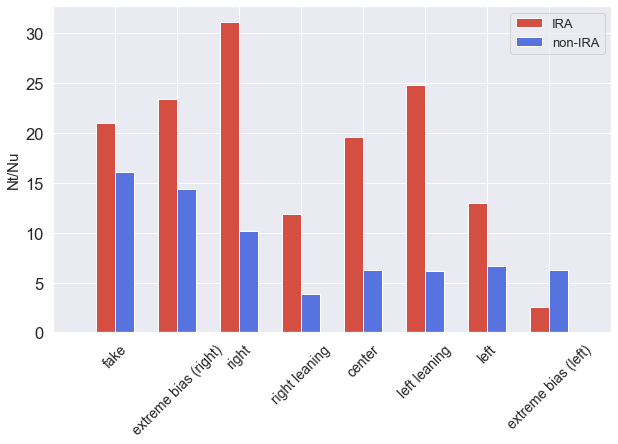

fake                    17.13
extreme bias (right)     5.23
right                   39.91
right leaning            4.95
center                  16.20
left leaning            29.10
left                     6.31
extreme bias (left)      1.27
Name: Ns/Nsu, dtype: float64
fake                    14.92
extreme bias (right)    11.94
right                    8.22
right leaning            4.15
center                   7.43
left leaning             5.80
left                     6.71
extreme bias (left)      4.87
Name: Ns/Nsu, dtype: float64


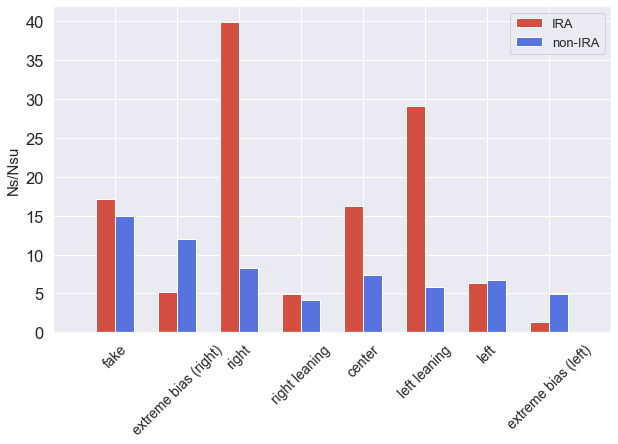

In [150]:
plot_compare("Pt")
plot_compare("Ps")
plot_compare("Ns/Nt")
plot_compare("Nt/Nu")
plot_compare("Ns/Nsu")

## 四个重要的社团，看看是否有针对性？

results from interaction_with_ira.ipynb

In [151]:
comm = json.load(open("data/louvain_rst_4.json"))
# comm = json.load(open("data/ira-ret-community.json"))

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,3042840,0.21,826339,0.27,0.25,85476,35.60,35566,23.23
extreme bias (right),3572803,0.25,852265,0.24,0.26,90464,39.49,37721,22.59
right,3214537,0.22,664897,0.21,0.20,95406,33.69,39783,16.71
right leaning,543896,0.04,114546,0.21,0.04,69558,7.82,20599,5.56
center,1791621,0.12,303325,0.17,0.09,90598,19.78,31720,9.56
left leaning,1532094,0.11,309267,0.20,0.09,86980,17.61,30911,10.01
left,657992,0.05,172658,0.26,0.05,56634,11.62,18265,9.45
extreme bias (left),90820,0.01,21851,0.24,0.01,10515,8.64,3383,6.46


115382 112


,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,2429,0.17,600,0.25,0.12,72,33.74,44,13.64
extreme bias (right),2796,0.20,239,0.09,0.05,69,40.52,40,5.98
right,2768,0.20,356,0.13,0.07,83,33.35,49,7.27
right leaning,579,0.04,168,0.29,0.03,55,10.53,29,5.79
center,2208,0.16,1399,0.63,0.27,91,24.26,60,23.32
left leaning,2922,0.21,2237,0.77,0.44,86,33.98,62,36.08
left,305,0.02,88,0.29,0.02,50,6.10,23,3.83
extreme bias (left),16,0.00,2,0.12,0.00,8,2.00,2,1.00


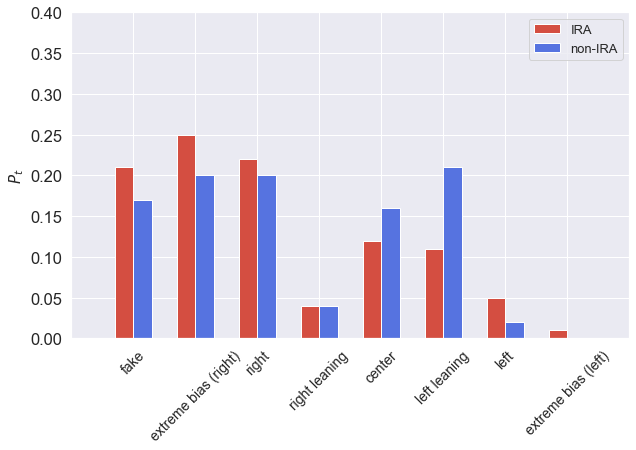

['fake', 'extreme bias (right)', 'right', 'right leaning', 'center', 'left leaning', 'left', 'extreme bias (left)']


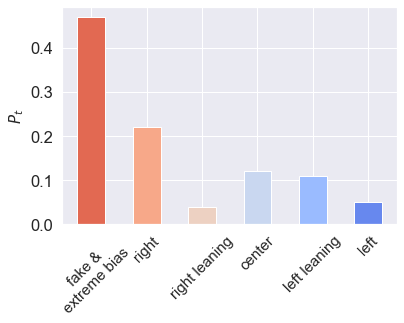

In [152]:
plot_community(0)

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,49733,0.03,22049,0.44,0.03,2306,21.57,1037,21.26
extreme bias (right),63839,0.04,30891,0.48,0.04,2866,22.27,1344,22.98
right,90733,0.05,48737,0.54,0.06,4463,20.33,2185,22.31
right leaning,42250,0.02,22321,0.53,0.03,4508,9.37,2091,10.67
center,388991,0.23,197320,0.51,0.24,10036,38.76,4747,41.57
left leaning,539380,0.32,231381,0.43,0.29,11524,46.80,6110,37.87
left,448228,0.26,219376,0.49,0.27,9320,48.09,4959,44.24
extreme bias (left),84564,0.05,35384,0.42,0.04,3304,25.59,1426,24.81


14808 168


,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,449,0.04,308,0.69,0.25,56,8.02,9,34.22
extreme bias (right),79,0.01,5,0.06,0.00,47,1.68,5,1.00
right,229,0.02,28,0.12,0.02,72,3.18,16,1.75
right leaning,1551,0.15,14,0.01,0.01,96,16.16,7,2.00
center,2702,0.25,78,0.03,0.06,123,21.97,28,2.79
left leaning,3303,0.31,491,0.15,0.41,126,26.21,25,19.64
left,2265,0.21,273,0.12,0.23,115,19.70,37,7.38
extreme bias (left),92,0.01,12,0.13,0.01,34,2.71,9,1.33


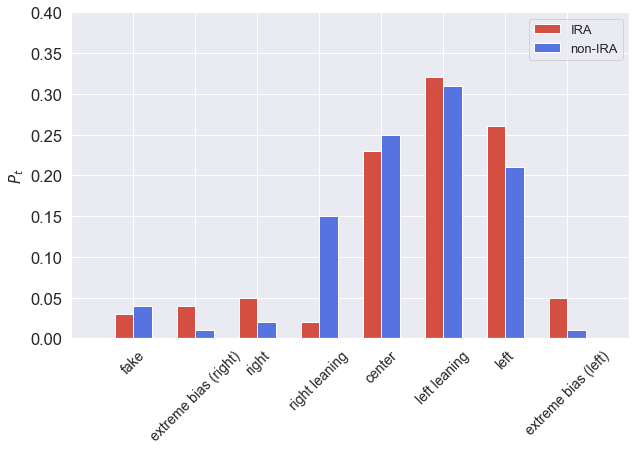

['fake', 'extreme bias (right)', 'right', 'right leaning', 'center', 'left leaning', 'left', 'extreme bias (left)']


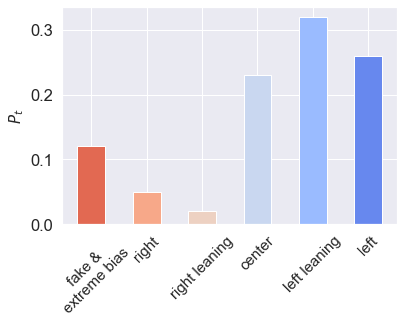

In [153]:
plot_community(1)

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,16349,0.08,4894,0.30,0.08,729,22.43,333,14.70
extreme bias (right),21701,0.11,7523,0.35,0.13,818,26.53,400,18.81
right,20131,0.10,5075,0.25,0.08,1126,17.88,556,9.13
right leaning,6134,0.03,2504,0.41,0.04,918,6.68,408,6.14
center,35179,0.18,8885,0.25,0.15,2045,17.20,949,9.36
left leaning,53619,0.27,17619,0.33,0.29,2304,23.27,1145,15.39
left,35498,0.18,11339,0.32,0.19,1690,21.00,875,12.96
extreme bias (left),7013,0.04,1985,0.28,0.03,590,11.89,221,8.98


3263 57


,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,17,0.07,0,0.00,0.0,10,1.70,0,NaN
extreme bias (right),8,0.03,2,0.25,0.2,7,1.14,2,1.0
right,17,0.07,1,0.06,0.1,15,1.13,1,1.0
right leaning,23,0.09,0,0.00,0.0,21,1.10,0,NaN
center,66,0.26,1,0.02,0.1,37,1.78,1,1.0
left leaning,64,0.25,4,0.06,0.4,37,1.73,4,1.0
left,57,0.22,2,0.04,0.2,36,1.58,2,1.0
extreme bias (left),2,0.01,0,0.00,0.0,2,1.00,0,NaN


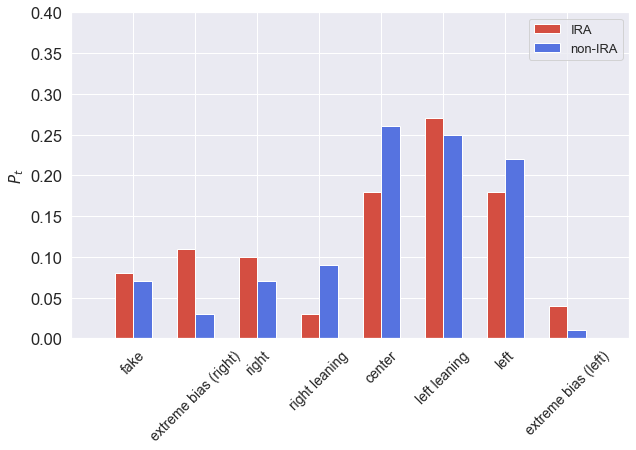

['fake', 'extreme bias (right)', 'right', 'right leaning', 'center', 'left leaning', 'left', 'extreme bias (left)']


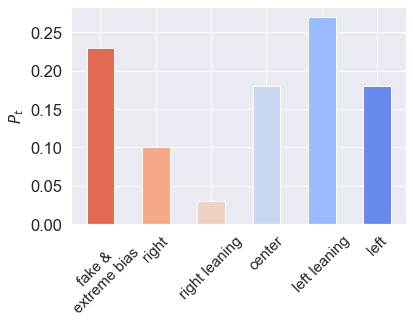

In [154]:
plot_community(3)

## top 25 sources and retweeers

In [155]:
for lab in labels:
    d = IRA_users.sort_values(lab + "_source", ascending=False)
    d = d[[lab, lab + "_source"]].head(25)
    # display(d)
    d.to_csv(f"data/IRA_{lab}_originators_top25.csv")

In [156]:
for lab in labels:
    _d = IRA_users[lab] - IRA_users[lab + "_source"]
    IRA_users[lab + "_retweet"] = _d
    _d = IRA_users.sort_values(lab + "_retweet", ascending=False)
    # display(d)
    _d[[lab, lab + "_retweet"]].head(25).to_csv(f"data/IRA_{lab}_retweeters_top25.csv")

## 说了这么多left的东西？究竟在说什么？

In [46]:
left_tweetids = set()

for line in tqdm(open("disk/all_IRA_tweets.json")):
    d = json.loads(line.strip())
    if d["c_mbfc"] == "left leaning":
        left_tweetids.add(d["tweetid"])

In [86]:
ira_data = pd.read_csv("data/ira-tweets-ele.csv", usecols=["tweetid", "tweet_text"], dtype=str)

In [93]:
cnt = 0
w_cnt = Counter()
with open("data/ira-left-text.txt", "w") as f:
    for i, row in tqdm(ira_data.iterrows()):
        if row["tweetid"] in left_tweetids and not row["tweet_text"].startswith("RT"):
            f.write(row["tweet_text"] + "\n")

## IRAs as sources

1. 看看每个用户发布的量
2. 找到top sources看看交集

结论：IRA从量上来看伪装非常普通的用户！

用户发帖量的分布 或 用户发source tweets的分布

fake


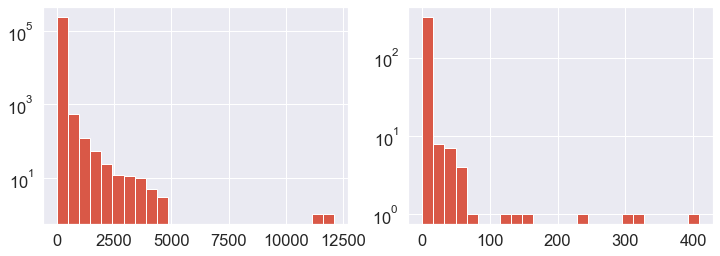

extreme bias (right)
right
right leaning
center
left leaning
left
extreme bias (left)


In [75]:
sns.set_style("darkgrid")

for lab in labels:
    print(lab)
    
    plt.figure(figsize=(12, 4))
    
    ax = plt.subplot(121)
    _users = all_users[all_users[lab] > 0]
    _users[lab].hist(ax=ax, bins=25)
    # USER_TABLE[lab] = _users[lab].describe()
    
    plt.yscale("log")
    # plt.xscale("log")
    
    ax = plt.subplot(122)
    IRA_users[lab].hist(ax=ax, bins=25)
    # IRA_USER_TABLE[lab] = IRA_users[lab].describe()
    
    plt.yscale("log")
    
    if lab == "fake":
        plt.show()
    plt.close()

### 从量的角度看IRA的确不高，甚至低于一般的用户

In [55]:
set_IRAs_users = set()

for user_id, row in IRA_users.iterrows():
    set_IRAs_users.add(user_id)
    
# print(len(set_IRAs_users))

In [35]:
top_num = 5000

for lab in labels:
    top_sources = set(all_users[lab].sort_values(ascending=False).head(top_num).index)
    # print(top_sources)
    len_intersection = len(top_sources & set_IRAs_users)
    print(lab, len_intersection)

fake 3
extreme bias (right) 5
right 6
right leaning 28
center 2
left leaning 3
left 0
extreme bias (left) 0


In [37]:
top_num = 5000

for lab in labels:
    top_sources = set(all_users[lab + "_source"].sort_values(ascending=False).head(top_num).index)
    # print(top_sources)
    len_intersection = len(top_sources & set_IRAs_users)
    print(lab, len_intersection)

fake 2
extreme bias (right) 1
right 4
right leaning 2
center 3
left leaning 7
left 1
extreme bias (left) 0


## IRA as influencers

分析IRA是不是影响力比较大的节点

In [210]:
# 方向 both undir out in

import graph_tool.all as gt
from pprint import pprint

def build_CI_rank(graph_file):
    rst = {}
    print(f"------------------{graph_file}------------------")
    g = gt.load_graph(graph_file)
    user_CI = {g.vp.id[v]: g.vp.CI_out[v] for v in g.vertices()}
    rst["out_CI"] = user_CI
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    rank = {d[0]: i + 1 for i, d in enumerate(st_user_CI)}
    print(f"Top 25 out:")
    pprint(st_user_CI[:25])
    
    rst["out_id"] = st_user_CI
    rst["out_rank"] = rank

    user_CI = {g.vp.id[v]: g.vp.CI_in[v] for v in g.vertices()}
    rst["in_CI"] = user_CI
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    rank = {d[0]: i + 1 for i, d in enumerate(st_user_CI)}
    print("Top 25 in:")
    pprint(st_user_CI[:25])
    
    rst["in_id"] = st_user_CI
    rst["in_rank"] = rank

    if graph_file.endswith("IRA_two_layers.gt"):
        user_CI = {g.vp.id[v]: g.vp.CI_undir[v] for v in g.vertices()}
        rst["undir_CI"] = user_CI
        st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
        rank = {d[0]: i + 1 for i, d in enumerate(st_user_CI)}
#         print("Top 10 undir:")
#         pprint(st_user_CI[:10])

        rst["undir_id"] = st_user_CI
        rst["undir_rank"] = rank
    
    
#     user_CI = {g.vp.id[v]: g.vp.CI_undir[v] for v in g.vertices()}
#     rst["undir_CI"] = user_CI
#     st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
#     rst["undir_id"] = st_user_CI
    
#     user_CI = {g.vp.id[v]: g.vp.CI_both[v] for v in g.vertices()}
#     rst["both_CI"] = user_CI
#     st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
#     rst["both_id"] = st_user_CI


    
    return rst

In [199]:
def get_cdf_pdf(data, mini=0, maxi=0, step=0, norm=True, scale=False):
    if scale:
        data = data.apply(np.log10)
    
    if maxi == 0:
        maxi = data.max()
    if step == 0:
        try:
            step = int((maxi - mini) / 50)
            if step == 0:
                step = 1
        except:
            step = 1
            
    print(mini, maxi, step)
    x = np.arange(mini, maxi, step, dtype=int)
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    x = pd.Series(x)
    cdf = pd.Series(cdf)
    pdf = pd.Series(pdf)
    
    return x, cdf, pdf

In [200]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)",
    "local",
]

# all_users = pd.read_csv("data/all-users-mbfc.csv", index_col="user_id", dtype={"user_id": str})
users = pd.read_csv("data/all-users.csv", index_col="user_id",
                    usecols =["user_id", "is_IRA"], dtype={"user_id": str, "is_IRA": int})
IRA_users = users[users.is_IRA > 0]
print(len(IRA_users))

360


In [ ]:
IRA_user_list = []
for u in IRA_users.index:
    if u in reversed_ira_map:
        IRA_user_list.append(reversed_ira_map[u])
    else:
        IRA_user_list.append(u)

json.dump(IRA_user_list, open("bingo_IRA_users.json", "w"))

In [101]:
ira_map = json.load(open("data/IRA_map.json"))

In [102]:
reversed_ira_map = {v: k for k, v in ira_map.items() if len(k) == 64}

------------------disk/network/fake.gt------------------
Top 10 out:
[('18643437', 17124306472),
 ('109065990', 15613472764),
 ('18856867', 13178750472),
 ('14669951', 11321630328),
 ('17980523', 10921818258),
 ('25073877', 10013443176),
 ('19211550', 9839434322),
 ('707278892801765377', 8958595140),
 ('825501626', 8881062705),
 ('4831603043', 8413322412)]
Top 10 in:
[('711393889731657732', 210375693),
 ('3321952723', 78977860),
 ('2545326607', 73945340),
 ('905898240', 63231123),
 ('173119648', 58203000),
 ('884311340', 55014102),
 ('1418775942', 53832917),
 ('714947334', 53427181),
 ('48866739', 53367120),
 ('404463989', 52530374)]
------------------disk/network/extreme bias (right).gt------------------
Top 10 out:
[('25073877', 39296229588),
 ('39308549', 32627052909),
 ('457984599', 26613250755),
 ('16589206', 23551250226),
 ('14669951', 19601072934),
 ('41634520', 19135455066),
 ('282695161', 19000511026),
 ('347627434', 14108794320),
 ('17980523', 12219797376),
 ('39344374', 1141

fake_out                      186/207591
fake_in                        21/207591
extreme bias (right)_out      249/267918
extreme bias (right)_in         4/267918
right_out                     195/381786
right_in                        2/381786
right leaning_out             395/254312
right leaning_in                2/254312
center_out                    561/975548
center_in                     108/975548
left leaning_out            1118/1196330
left leaning_in              617/1196330
left_out                     1893/587617
left_in                       942/587617
extreme bias (left)_out       3757/83672
extreme bias (left)_in        6268/83672
local_out                      154/96229
local_in                        12/96229
dtype: object

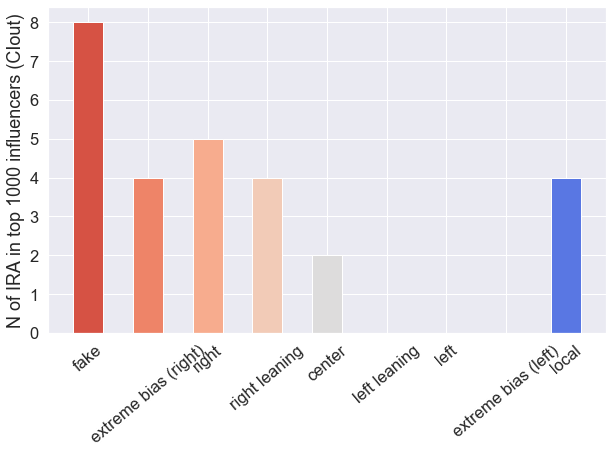

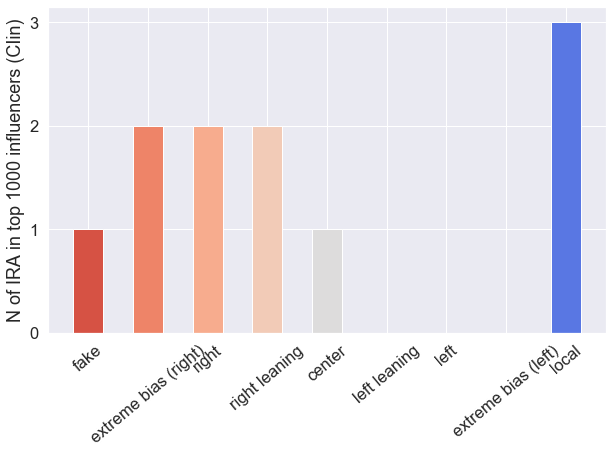

In [201]:
top_num = 1000

len_intersection = {}
dict_CI = defaultdict(dict)
dict_ira_rank = {}
top_10_users = {}

for label in tqdm(labels):
    # print(label, "...")
    rst = build_CI_rank("disk/network/{}.gt".format(label))
    
    for dire in ["out", "in"]:
        # print(label, dire, "...")
        user_CI = rst[dire + "_CI"]
        rank = rst[dire + "_rank"]
        ira_rank = {}
        # top list
        set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

        set_source_users = set()
        IRA_CI = []
        for user_id, row in IRA_users.iterrows():
            set_source_users.add(user_id)
            try:
                IRA_CI.append(user_CI[user_id])
                ira_rank[user_id] = rank[user_id]
            except:
                pass
            
        # print(f"---- IRA rank ---- {label} {dire}")
        ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
        top_10_users[f"{label}_{dire}"] = ira_rank[:10]
        
        len_intersection[dire + "_" + label] = len(set_CI_users & set_source_users)
        # print("参与人数：", len(IRA_CI), len(sort_user_CI))
        IRA_CI = pd.Series(IRA_CI)
        IRA_CI_sum = IRA_CI.sum()
        
        # 总体排名
        # print("IRA sum", IRA_CI_sum, np.log(IRA_CI_sum))
        for i, d in enumerate(rst[dire + "_id"]):
            if IRA_CI_sum >= d[1] :
                break
        dict_ira_rank[label + "_" + dire] = f"{i+1}/{len(user_CI)}"

        non_CI = pd.Series([v for u, v in user_CI.items() if u not in ira_rank])
        all_CI = pd.Series(list(user_CI.values()))

        IRA_CI_mean = IRA_CI.mean()
        all_CI_mean = all_CI.mean()
        non_CI_mean = non_CI.mean()

        dict_CI[label][dire + "_IRA"] = IRA_CI_mean
        dict_CI[label][dire + "_All users"] = all_CI_mean
        dict_CI[label][dire + "_non_IRA"] = non_CI_mean
        
        dict_CI[label][dire + "_IRA dist"] = IRA_CI
        dict_CI[label][dire + "_All dist"] = all_CI
        dict_CI[label][dire + "_non dist"] = non_CI

        
# print(dict_CI)
compare_CI_value = pd.DataFrame(dict_CI).transpose()
# compare_CI_value
display(pd.Series(dict_ira_rank))


# Top 1000
def plot_corr(cor, dire):
    # display(cor)
    plt.figure(figsize=(10, 6))
    x = range(len(labels))
    for i in x:
        plt.bar(i, cor[dire + "_" + labels[i]], width=0.5, 
                  color=sns.color_palette("coolwarm", len(labels))[len(labels) - 1 - i])
    plt.xticks(x, labels, rotation=40)

    if dire == "in":
        plt.yticks(range(4))
        
    plt.ylabel(f'N of IRA in top {top_num} influencers (CI{dire})'.format(top_num))
    plt.savefig("fig/size-of-inter-{}-{}.pdf".format(top_num, dire),
                dpi=300, bbox_inches='tight')
    plt.show()
    plt.tight_layout()
    plt.close()

# for dire in ["out", "undir", "both", "in"]:
for dire in ["out", "in"]:
    plot_corr(len_intersection, dire)


# from scipy.stats import ks_2samp

# # for dire in ["out", "undir", "both", "in"]:
# for dire in ["out", "in"]:
#     ax = plt.figure(figsize=(10, 6))
#     plt.ylabel("Average CI score")
#     compare_CI_value[dire + "_IRA"].plot.bar(width=0.3, position=1.1, 
#                                      color=ira_c, label="IRA")
#     compare_CI_value[dire + "_non_IRA"].plot.bar(width=0.3, position=-0.1, 
#                                      color=all_c, label="non-IRA")
    
#     print(compare_CI_value[dire + "_IRA"])
#     print(compare_CI_value[dire + "_non_IRA"])
    
#     # 显著性检验    
#     _ticks = []
#     for label in labels:
#         d = dict_CI[label]
#         pvalue = ks_2samp(d[dire + "_IRA dist"], d[dire + "_non dist"])[1]
#         print(label, dire, "pvalue = {:.3f}".format(pvalue))
#         if pvalue < 0.001:
#             _ticks.append(label + "\n p<0.001***")
#         elif pvalue < 0.01:
#             _ticks.append("{}\n p={:.3f}**".format(label, pvalue))
#         elif pvalue < 0.05:
#             _ticks.append("{}\n p={:.3f}*".format(label, pvalue))
#         else:
#             _ticks.append("{}\n p>0.05".format(label))
    
#     plt.xticks(range(len(labels)), _ticks, rotation=40, fontsize=12)
#     plt.xlim(-1, len(labels))
#     plt.legend()

#     plt.tight_layout()
#     plt.savefig("fig/CI_{}.pdf".format(dire), dpi=300, bbox_inches='tight')
#     plt.show()
#     plt.close()

In [208]:
G = nx.read_gpickle("data/IRA-two-layers.gpickle")
IRA_users = [n for n in G.nodes() if G.node[n]["IRA"] == 1]
len(IRA_users)

510

In [211]:
top_num = 100

len_intersection = {}
dict_CI = defaultdict(dict)
top_10_users = {}

rst = build_CI_rank("data/IRA_two_layers.gt")

for dire in ["out", "in", "undir"]:
    user_CI = rst[dire + "_CI"]
    rank = rst[dire + "_rank"]
    
    # top 100 list
    set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

    set_source_users = set()
    IRA_CI = []
    ira_rank = {}
    for user_id in IRA_users:
        set_source_users.add(user_id)
        try:
            IRA_CI.append(user_CI[user_id])
            ira_rank[user_id] = rank[user_id]
            # print(user_id, rank[user_id])
        except:
            pass

    # print(f"---- IRA rank ---- {label} {dire}")
    ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
    top_10_users[dire] = ira_rank[:10]


    len_intersection[dire] = len(set_CI_users & set_source_users)
    
#     print("参与人数：", len(IRA_CI), len(sort_user_CI))
#     IRA_CI = pd.Series(IRA_CI)
#     IRA_CI_sum = IRA_CI.sum()

#     non_CI = pd.Series([v for u, v in user_CI.items() if u not in ira_rank])
#     all_CI = pd.Series(list(user_CI.values()))

#     IRA_CI_mean = IRA_CI.mean()
#     all_CI_mean = all_CI.mean()
#     non_CI_mean = non_CI.mean()

#     dict_CI[dire + "_IRA"] = IRA_CI_mean
#     dict_CI[dire + "_All users"] = all_CI_mean
#     dict_CI[dire + "_non_IRA"] = non_CI_mean

#     dict_CI[dire + "_IRA dist"] = IRA_CI
#     dict_CI[dire + "_All dist"] = all_CI
#     dict_CI[dire + "_non dist"] = non_CI

from pprint import pprint
pprint(len_intersection)
pprint(top_10_users)

# print(dict_CI)
# compare_CI_value = pd.DataFrame(dict_CI).transpose()

------------------data/IRA_two_layers.gt------------------
Top 25 out:
[('4224729994', 172612652250),
 ('274891222', 129275984000),
 ('4272870988', 114675165760),
 ('4218156466', 105542500816),
 ('710990834972233728', 94809306592),
 ('1367531', 92848353048),
 ('347627434', 88280598912),
 ('16589206', 87002488287),
 ('33529092', 82434955036),
 ('78523300', 75008398640),
 ('216776631', 73659670092),
 ('759251', 73405914054),
 ('197496309', 72482714172),
 ('3284112337', 69117844488),
 ('282695161', 67761529836),
 ('466144416', 66858562687),
 ('1339835893', 66418217072),
 ('39344374', 64309558968),
 ('26487169', 62809482449),
 ('4236806414', 61592078893),
 ('4261318354', 60832392040),
 ('393190233', 60071900824),
 ('1075681177', 59764210688),
 ('1536791610', 59074422600),
 ('3677742792', 59053597825)]
Top 25 in:
[('1679279490', 25639761996),
 ('3376927462', 15888574484),
 ('1671234620', 10196727984),
 ('758683522118791168', 6215935310),
 ('1662779209', 5193542025),
 ('2606301939', 50067629

In [222]:
top_users = [('4224729994', 172612652250),
             ('274891222', 129275984000),
             ('4272870988', 114675165760),
             ('4218156466', 105542500816),
             ('710990834972233728', 94809306592),
             ('1367531', 92848353048),
             ('347627434', 88280598912),
             ('16589206', 87002488287),
             ('33529092', 82434955036),
             ('78523300', 75008398640),
             ('216776631', 73659670092),
             ('759251', 73405914054),
             ('197496309', 72482714172),
             ('3284112337', 69117844488),
             ('282695161', 67761529836),
             ('466144416', 66858562687),
             ('1339835893', 66418217072),
             ('39344374', 64309558968),
             ('26487169', 62809482449),
             ('4236806414', 61592078893),
             ('4261318354', 60832392040),
             ('393190233', 60071900824),
             ('1075681177', 59764210688),
             ('1536791610', 59074422600),
             ('3677742792', 59053597825)]

top_users_in = [('1679279490', 25639761996),
 ('3376927462', 15888574484),
 ('1671234620', 10196727984),
 ('758683522118791168', 6215935310),
 ('1662779209', 5193542025),
 ('2606301939', 5006762970),
 ('2671070290', 4992389550),
 ('1661246144', 4849513384),
 ('3438999494', 4550574708),
 ('2491081213', 4518696113),
 ('29350302', 4353767660),
 ('2545326607', 4069558080),
 ('2882013788', 3892137998),
 ('552335271', 3772931400),
 ('1400514948', 3697138440),
 ('247558666', 3543471481),
 ('2535166748', 3515293392),
 ('3408262787', 3464381004),
 ('3083844539', 3353930050),
 ('2341977604', 3204744920),
 ('19921268', 3190017068),
 ('2980186012', 3072018600),
 ('3321952723', 3069986339),
 ('1629828379', 3050324005),
 ('714947334', 2922985676)]


from SQLite_handler import find_name
from fake_identify import Are_you_IRA

Putin = Are_you_IRA()

for u in top_users:
    if Putin.fuck(u[0]):
        _u = find_name(u[0])[6]
        if _u and Putin.fuck(u[0]):
            print(find_name(u[0])[6], "√")
        else:
            print(find_name(u[0])[6])

@TEN_GOP √
@bfraser747
@Pamela_Moore13 √
@America_1st_ √
@Always_Trump
@FoxNews
@LindaSuhler
@wikileaks
@SandraTXAS
@RealJamesWoods
@BernieSanders
@CNN
@FrankLuntz
@WeNeedTrump
@WayneDupreeShow
@TrumpSuperPAC
@HillaryClinton
@DonaldJTrumpJr
@LouDobbs
@JohnKStahlUSA
@Stevenwhirsch99
@LeahR77
@2ALAW
@POTUS
@immigrant4trump


In [146]:
top_num = 1000

len_intersection = {}
dict_CI = defaultdict(dict)
dict_ira_rank = {}
top_10_users = {}

label = "fake_extre"
rst = build_CI_rank("disk/network/fake_extreme_v2.gt")
for dire in ["out", "in"]:
#         print(label, dire, "...")
    user_CI = rst[dire + "_CI"]
    rank = rst[dire + "_rank"]
    ira_rank = {}
    # top list
    set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

    set_source_users = set()
    IRA_CI = []
    for user_id, row in IRA_users.iterrows():
        set_source_users.add(user_id)
        try:
            IRA_CI.append(user_CI[user_id])
            ira_rank[user_id] = rank[user_id]
        except:
            pass

    ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
    top_10_users[f"{label}_{dire}"] = ira_rank[:10]

    len_intersection[dire + "_" + label] = len(set_CI_users & set_source_users)
    # print("参与人数：", len(IRA_CI), len(sort_user_CI))
    IRA_CI = pd.Series(IRA_CI)
    IRA_CI_sum = IRA_CI.sum()

    # 总体排名
    # print("IRA sum", IRA_CI_sum, np.log(IRA_CI_sum))
    for i, d in enumerate(rst[dire + "_id"]):
        if d[1] <= IRA_CI_sum:
            break
    dict_ira_rank[label + "_" + dire] = f"{i+1}/{len(user_CI)}"


#         IRA_CI_mean = IRA_CI.mean()
    IRA_CI_mean = IRA_CI.mean()
    all_CI = pd.Series(list(user_CI.values()))
#         all_CI_mean = all_CI.mean()
    all_CI_mean = all_CI.mean()

    dict_CI[label][dire + "_IRA"] = IRA_CI_mean
    dict_CI[label][dire + "_All users"] = all_CI_mean
    dict_CI[label][dire + "_IRA dist"] = IRA_CI
    dict_CI[label][dire + "_All dist"] = all_CI

In [228]:
json.dump(top_10_users, open("data/top_10_ira.json", "w"))

for label in labels:
    for dire in ["out", "in"]:
        x, cdf, pdf = get_cdf_pdf(dict_CI[label][dire + "_All dist"], scale=True) 
        plt.plot(x, cdf, color=all_c, label="All users", lw=2)
        x, cdf, pdf = get_cdf_pdf(dict_CI[label][dire + "_IRA dist"], scale=True)
        plt.plot(x, cdf, color=ira_c, label="IRA", lw=2)
        print("CI score\n category:{}\ndirection:{}".format(label, dire))
        plt.yscale("log")
        plt.ylabel("CCDF"); plt.xlabel("CI score")
        plt.legend()
        plt.show(); plt.close()

# Who is collective influencers?

fake news最有影响力的用户

TOP 100 CIs!!

In [109]:
db_uid_name = {}
for line in tqdm(open("disk/user_info.json")):
    w = line.strip().split(",")
    db_uid_name[w[0]] = {
        "name": w[1],
        "fol": w[2],
        "fri": w[3],
    }

In [111]:
g = gt.load_graph("disk/network/fake_nc.gt")
map_user_id = {i: g.vp.id[v] for i, v in enumerate(g.vertices())}

In [114]:
top_user_list = {}

# both
user_CI = {g.vp.id[v]: g.vp.CI_both[v] for v in g.vertices()}
st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)

cnt = 0
top_users = []
for user_id, v in st_user_CI:
    cnt += 1
    # print(map_user_id[v], g.vp.CI_both[v])
    # print(user_id, db_user_name[user_id], v)
    # print(db_user_name[user_id], v)
    
    top_users.append(db_uid_name[user_id]["name"])
    if cnt >= 100:
        break

top_user_list["Top CI(both)"] = top_users

In [115]:
# out
user_CI = {g.vp.id[v]: g.vp.CI_out[v] for v in g.vertices()}
st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)

cnt = 0
top_users = []
for user_id, v in st_user_CI:
    cnt += 1
    # print(map_user_id[v], g.vp.CI_both[v])
    # print(user_id, db_user_name[user_id], v)
    # print(db_user_name[user_id], v)
    
    top_users.append(db_uid_name[user_id]["name"])
    if cnt >= 100:
        break
        
top_user_list["Top CI(out)"] = top_users

In [8]:
d = pd.read_csv("data/CI_dyn.txt", dtype=str)
d = d.astype({"source": int, "CI_dynamics": int})

In [9]:
d["ave_CI_dyn"] = d["CI_dynamics"] / d["source"]

In [11]:
uids = d.sort_values("CI_dynamics", ascending=False).user_id
top_users = []

for user_id in uids:
    top_users.append(db_user_name[user_id])
    print(user_id, db_user_name[user_id])
    if len(top_users) >= 100:
        break
        
top_user_list["Top CI dynamics"] = top_users

825501626 VivaLaAmes
18643437 PrisonPlanet
109065990 RealAlexJones
19211550 gatewaypundit
17980523 mitchellvii
4855687055 Lagartija_Nix
707278892801765377 TruthFeedNews
18856867 zerohedge
2242085304 RickRWells
14669951 DRUDGE_REPORT
4831603043 TPoliticmanager
3022045469 ThePatriot143
3914047581 Italians4Trump
14505245 infowars
25073877 realDonaldTrump
704034081898668032 Miami4Trump
1575689569 BigStick2013
39344374 DonaldJTrumpJr
4510755552 _Makada_
2728672957 KitDaniels1776
1564676498 surfermom77
19173608 JayS2629
3270559782 MONAKatOILS
567626521 jko417
122455671 TeaPartyOrg
2217181338 conserv_tribune
4717892303 V_of_Europe
1494835716 AIIAmericanGirI
27404671 SavageNation
358545917 Cernovich
4786763677 MOVEFORWARDHUGE
975217231 JrcheneyJohn
53297881 redflagnews
2845849081 ARnews1936
999453985 BlissTabitha
4165642155 ConstanceQueen8
4584443975 TRUMP_PREZ
72882689 SonofLiberty357
2417844248 _Proud_American
788571666 EjHirschberger
2164876369 RepStevenSmith
16589206 wikileaks
779739206339

In [181]:
uids = d.sort_values("ave_CI_dyn", ascending=False).user_id
top_users = []

for user_id in uids:
    top_users.append(db_user_name[user_id])
    if len(top_users) >= 100:
        break
        
top_user_list["Top average CI dynamics"] = top_users

In [182]:
d = pd.DataFrame(top_user_list)
d.index += 1
d.to_csv("data/top_users.csv")

## IRAs as supporters 

In [ ]:
from collections import Counter
sns.color_palette("RdBu", n_colors=7)

count = Counter(first_opinion)
print(count)

label = ["pro-hillary", "pro-trump"]
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('First source', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(staters_opinion)
print(count)

plt.subplot(132)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('source', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(other_opinion)
print(count)

plt.subplot(133)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('non-source', fontsize=15)
# plt.ylabel('N of fake sources', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

plt.savefig("fig/support.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# 网络分析

分析每种媒体网络中IRA的节点数量，相关边的数量，平均度，最大度等。

In [170]:
from fake_identify import Are_you_IRA

putin = Are_you_IRA()

def get_G_char(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    k = G.number_of_edges() / G.number_of_nodes()

    out_d = pd.Series([k[1] for k in G.out_degree()])
    # print(out_d)
    ave_out_d = out_d.mean()
    std_out_d = out_d.std() / k
    max_out_d = out_d.max()

    in_d = pd.Series([k[1] for k in G.in_degree()])
    # print(in_d)
    ave_in_d = in_d.mean()
    std_in_d = in_d.std() / k
    max_in_d = in_d.max()

    return {
        "N nodes": int(n_nodes),
        "N edges": int(n_edges),
        "<k>": k,
        "std(k_out) / <k>": std_out_d,
        "std(k_in) / <k>": std_in_d,
        "max(k_out)": int(max_out_d),
        "max(k_in)": int(max_in_d),
    }        


def get_G_char_IRA(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    nodes = [uid for uid in putin.IRA_user_set if G.has_node(uid)]
    
    n_nodes = len(nodes)
    
    cover_set = set()
    for n in nodes:
        for _n in G[n]:
#             if putin.fuck(_n):
#                 continue
            cover_set.add(_n)
            
    out_d = pd.Series([G.out_degree(n) for n in nodes])
    ave_k_out = out_d.sum() / n_nodes
    std_k_out = out_d.std() / ave_k_out
    max_out_d = out_d.max()

    in_d = pd.Series([G.in_degree(n) for n in nodes])
    ave_k_in = in_d.sum() / n_nodes
    std_k_in = in_d.std() / ave_k_in
    max_in_d = in_d.max()
    
    return {
        "N nodes": int(n_nodes),
        "<k_out>": ave_k_out,
        "<k_in>": ave_k_in,
        "std(k_out) / <k_out>": std_k_out,
        "std(k_in) / <k_in>": std_k_in,
        "N cover": len(cover_set),
        "max(k_out)": int(max_out_d),
        "max(k_in)": int(max_in_d),
    }


In [171]:
networks_char = {}

for category in labels:
    rst = get_G_char("disk/network/{}.gpickle".format(category))
    networks_char[category] = rst

disk/network/fake.gpickle ...
disk/network/extreme bias (right).gpickle ...
disk/network/right.gpickle ...
disk/network/right leaning.gpickle ...
disk/network/center.gpickle ...
disk/network/left leaning.gpickle ...
disk/network/left.gpickle ...
disk/network/extreme bias (left).gpickle ...
disk/network/local.gpickle ...


In [172]:
networks_char = pd.DataFrame(networks_char).round(1).transpose()
networks_char = networks_char[["N nodes", "N edges", "<k>", "std(k_out) / <k>", "std(k_in) / <k>", "max(k_out)", "max(k_in)"]]
networks_char = networks_char.astype({
    "N nodes": int,
    "N edges": int,
    "max(k_out)": int,
    "max(k_in)": int,
})

networks_char.to_csv("data/table_all_network.csv", float_format="%.1f")
networks_char

,N nodes,N edges,<k>,std(k_out) / <k>,std(k_in) / <k>,max(k_out),max(k_in)
fake,207591,1583697,7.6,29.6,2.7,45449,1234
extreme bias (right),267918,1904513,7.1,38.0,2.8,60622,642
right,381786,2131027,5.6,48.1,2.8,87229,546
right leaning,254312,631580,2.5,50.0,1.8,38994,147
center,975548,2961319,3.0,122.6,2.8,257580,551
left leaning,1196330,4340759,3.6,73.5,3.5,172056,942
left,587617,2078855,3.5,50.4,3.6,59759,797
extreme bias (left),83672,299399,3.6,33.8,2.5,23210,659
local,96229,141610,1.5,24.8,1.1,5772,119


In [173]:
networks_char = {}

for category in labels:
    rst = get_G_char_IRA("disk/network/{}.gpickle".format(category))
    networks_char[category] = rst

disk/network/fake.gpickle ...
disk/network/extreme bias (right).gpickle ...
disk/network/right.gpickle ...
disk/network/right leaning.gpickle ...
disk/network/center.gpickle ...
disk/network/left leaning.gpickle ...
disk/network/left.gpickle ...
disk/network/extreme bias (left).gpickle ...


/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


disk/network/local.gpickle ...


In [174]:
networks_char = pd.DataFrame(networks_char).round(1).transpose()
networks_char = networks_char[["N nodes", "<k_out>", "<k_in>", "std(k_out) / <k_out>", "std(k_in) / <k_in>", "max(k_out)", "max(k_in)"]]
networks_char = networks_char.astype({
    "N nodes": int,
    "max(k_out)": int,
    "max(k_in)": int,
})

networks_char.to_csv("data/table_IRA_network.csv", float_format="%.1f")
networks_char

,N nodes,<k_out>,<k_in>,std(k_out) / <k_out>,std(k_in) / <k_in>,max(k_out),max(k_in)
fake,127,22.3,10.4,4.1,2.4,716,205
extreme bias (right),117,17.5,14.2,4.2,2.4,563,250
right,152,18.9,11.2,5.4,2.7,864,253
right leaning,164,2.6,3.7,5.1,1.9,107,68
center,228,4.3,7.8,6.7,1.5,310,128
left leaning,228,6.5,10.2,4.7,1.3,270,142
left,186,2.5,8.4,6.8,1.0,154,60
extreme bias (left),37,0.0,1.9,NaN,0.9,0,8
local,141,4.1,3.1,4.3,0.9,143,20
